# Clustering the subsampled 1.3 M cells

The data consists in 20K Neurons, downsampled from *1.3 Million Brain Cells from E18 Mice* and is freely available from 10x Genomics ([here](http://cf.10xgenomics.com/samples/cell-exp/1.3.0/1M_neurons/1M_neurons_neuron20k.h5)).

In [1]:
import numpy as np
import scanpy.api as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=70)  # dots (pixels) per inch determine size of inline figures
sc.logging.print_versions()

scanpy==1.0 anndata==0.5.8 numpy==1.14.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata = sc.read_10x_h5('./data/1M_neurons_neuron20k.h5')

reading ./data/1M_neurons_neuron20k.h5 Variable names are not unique. To make them unique, call `.var_names_make_unique`.
(0:00:03.78)


In [3]:
adata

AnnData object with n_obs × n_vars = 20000 × 27998 
    var: 'gene_ids'

Run standard preprocessing steps, see [here](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.pp.recipe_zheng17.html#scanpy.api.pp.recipe_zheng17).

In [4]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
    finished (0:00:05.12)


In [5]:
sc.tl.tsne(adata)

computing tSNE
         Falling back to preprocessing with `sc.pp.pca` and default params.
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:01:14.74) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [6]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:10.12) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [7]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:05.67) --> found 23 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


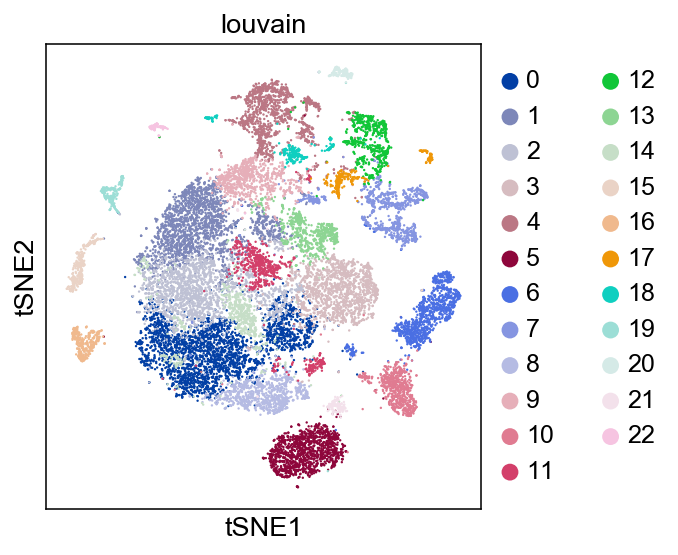

In [9]:
sc.pl.tsne(adata, color='louvain')

In [8]:
adata.write('./write/subsampled.h5ad')